In [2]:
import py_vncorenlp
from vncorenlp import VnCoreNLP
import pandas as pd
import numpy as np
import json
from app_store_scraper import AppStore
import re
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures,TrigramCollocationFinder,TrigramAssocMeasures
from wordcloud import WordCloud
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt

In [3]:
vncorenlp_file = r"E:\VnCoreNLP-master\VnCoreNLP-master\VnCoreNLP-1.1.1.jar"
#with VnCoreNLP(vncorenlp_file) as vncorenlp:
#        print('Tokenizing:', vncorenlp.tokenize(sentences))sS
vncorenlp = VnCoreNLP(vncorenlp_file)

In [ ]:
shopee = AppStore(country='vn', app_name='11.11 Shopee Live', app_id = '959841449')
shopee.review(how_many=3000)

2023-11-03 20:00:40,508 [INFO] Base - Initialised: AppStore('vn', '11-11-shopee-live', 959841449)
2023-11-03 20:00:40,508 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/vn/app/11-11-shopee-live/id959841449
2023-11-03 20:00:45,620 [INFO] Base - [id:959841449] Fetched 340 reviews (340 fetched in total)
2023-11-03 20:00:50,918 [INFO] Base - [id:959841449] Fetched 660 reviews (660 fetched in total)
2023-11-03 20:00:56,395 [INFO] Base - [id:959841449] Fetched 980 reviews (980 fetched in total)
2023-11-03 20:01:01,946 [INFO] Base - [id:959841449] Fetched 1300 reviews (1300 fetched in total)
2023-11-03 20:01:07,343 [INFO] Base - [id:959841449] Fetched 1620 reviews (1620 fetched in total)
2023-11-03 20:01:12,939 [INFO] Base - [id:959841449] Fetched 1980 reviews (1980 fetched in total)
2023-11-03 20:01:18,433 [INFO] Base - [id:959841449] Fetched 2300 reviews (2300 fetched in total)
2023-11-03 20:01:23,798 [INFO] Base - [id:959841449] Fetched 2620 reviews (2620 fetched in tota

In [ ]:
shopee.reviews

[{'date': datetime.datetime(2019, 3, 22, 11, 51, 52),
  'developerResponse': {'id': 7865357,
   'body': 'Trần Thị Bích Phượng | Bộ phận chăm sóc khách hàng | Shopee Việt Nam',
   'modified': '2019-03-23T02:41:52Z'},
  'review': 'Vào app xem đc tầm 5p là bị văng ra,từ đầu còn tưởng do máy nhưng đổi đến 3 cái mày vẫn bị vậy rất bực mình.mong sẽ khắc phục sớm cho ng sử dụng bớt ức chế',
  'rating': 3,
  'isEdited': False,
  'userName': 'hangghiio',
  'title': 'Lỗi'},
 {'date': datetime.datetime(2020, 3, 6, 10, 13, 4),
  'developerResponse': {'id': 13915074,
   'body': 'Chào bạn, cảm ơn bạn đã phản hồi. Phí vận chuyển được tính theo khối lượng, kích thước khi đóng gói và khoảng cách giữa người bán và người mua, Shopee sẽ cố gắng tìm ra giải pháp hỗ trợ người dùng tốt hơn, thể lệ chương trình miễn phí vận chuyển, bạn tham khảo tại: https://shopee.vn/events3/code/1441554913',
   'modified': '2020-03-08T03:17:09Z'},
  'review': 'Miễn phí vận chuyển nhưng khi đặt hàng mua vẫn phải trả tiền vận

In [ ]:
df = pd.DataFrame(np.array(shopee.reviews),columns=['review'])
df2 = df.join(pd.DataFrame(df.pop('review').tolist()))
df2.head()

,date,developerResponse,review,rating,isEdited,userName,title
0,2019-03-22 11:51:52,"{'id': 7865357, 'body': 'Trần Thị Bích Phượng ...","Vào app xem đc tầm 5p là bị văng ra,từ đầu còn...",3,False,hangghiio,Lỗi
1,2020-03-06 10:13:04,"{'id': 13915074, 'body': 'Chào bạn, cảm ơn bạn...",Miễn phí vận chuyển nhưng khi đặt hàng mua vẫn...,1,False,vẫn mất tiền,Ứng dụng ghi Miễn phí vận chuyển nhưng khi đặt...
2,2020-11-13 15:28:52,"{'id': 19110563, 'body': 'Chào bạn ennejkdj, c...","Tôi mua nhiều lần trên shopee, sau đó tôi phát...",1,False,ennejkdj,Shopee gian lận đối với người mua hàng lâu năm
3,2020-04-27 17:05:18,"{'id': 14953043, 'body': 'Chào bạn, cảm ơn bạn...",mua hàng giao không đúng hàng. gọi lên chăm só...,1,False,sjakwodn,.
4,2020-04-08 09:52:28,"{'id': 15714906, 'body': 'Nhận ngay khoản vay ...",Hàng có 60k mà phí ship tận 130k :),1,False,dat lanh chanh,Quá đắt


In [ ]:
df2.to_csv(r'C:\Users\Admin\PycharmProjects\work\App Store Review lazada.csv')

In [4]:
df = pd.read_csv(r"C:\Users\Admin\PycharmProjects\work\App Store Review lazada.csv")

In [5]:
df.head()

,Unnamed: 0,date,developerResponse,review,rating,isEdited,userName,title
0,0,2019-03-22 11:51:52,"{'id': 7865357, 'body': 'Trần Thị Bích Phượng ...","Vào app xem đc tầm 5p là bị văng ra,từ đầu còn...",3,False,hangghiio,Lỗi
1,1,2020-03-06 10:13:04,"{'id': 13915074, 'body': 'Chào bạn, cảm ơn bạn...",Miễn phí vận chuyển nhưng khi đặt hàng mua vẫn...,1,False,vẫn mất tiền,Ứng dụng ghi Miễn phí vận chuyển nhưng khi đặt...
2,2,2020-11-13 15:28:52,"{'id': 19110563, 'body': 'Chào bạn ennejkdj, c...","Tôi mua nhiều lần trên shopee, sau đó tôi phát...",1,False,ennejkdj,Shopee gian lận đối với người mua hàng lâu năm
3,3,2020-04-27 17:05:18,"{'id': 14953043, 'body': 'Chào bạn, cảm ơn bạn...",mua hàng giao không đúng hàng. gọi lên chăm só...,1,False,sjakwodn,.
4,4,2020-04-08 09:52:28,"{'id': 15714906, 'body': 'Nhận ngay khoản vay ...",Hàng có 60k mà phí ship tận 130k :),1,False,dat lanh chanh,Quá đắt


In [6]:
df['Date'] = pd.to_datetime(df["date"]).dt.date

In [14]:
data = df.groupby("Date").size().reset_index()
data.columns = ['Date', 'Count']

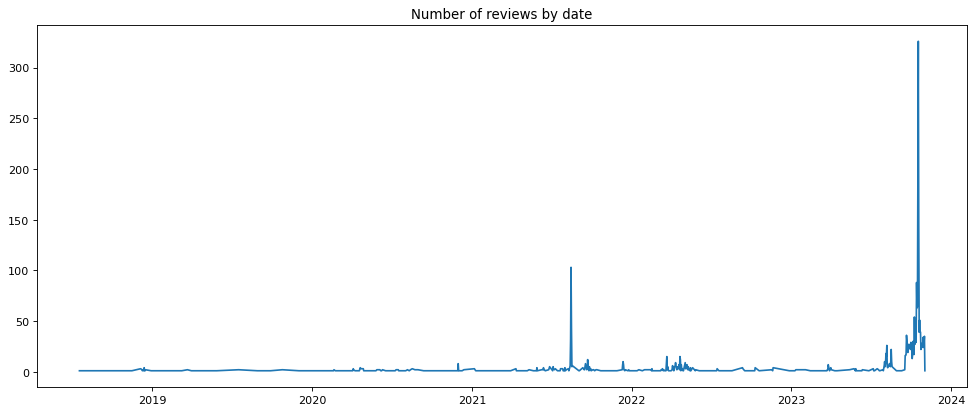

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
plt.title('Number of reviews by date')
plt.plot(data['Date'],data['Count'])

In [30]:
df['review']

0                                                   Vào app xem đc tầm 5p là bị văng ra,từ đầu còn tưởng do máy nhưng đổi đến 3 cái mày vẫn bị vậy rất bực mình.mong sẽ khắc phục sớm cho ng sử dụng bớt ức chế
1                                                                                                                                   Miễn phí vận chuyển nhưng khi đặt hàng mua vẫn phải trả tiền vận chuyển nữa
2       Tôi mua nhiều lần trên shopee, sau đó tôi phát hiện phí ship của mình tăng cao hơn trước dù mua giá ko hề thấp so với trước đây. Tôi dùng điện thoại người thân chọn mua hàng CÙNG LOẠI như trong dt...
3       mua hàng giao không đúng hàng. gọi lên chăm sóc khách hàng shopee thì bảo đợi giải quyết. 1 tuần sau gửi cho cái mail đổ lỗi cho khách hàng rồi nói không liên quan tới shopee nên không giải quyết ...
4                                                                                                                                                                       

In [21]:
pd.options.display.max_colwidth = 200
df['tokenize'] = df['review'].apply(lambda x:vncorenlp.tokenize(x))
df['tokenize'].head()

0      [[Vào, app, xem, đc, tầm, 5p, là, bị, văng, ra, ,, từ, đầu, còn, tưởng, do, máy, nhưng, đổi, đến, 3, cái, mày, vẫn, bị, vậy, rất, bực, mình.mong, sẽ, khắc_phục, sớm, cho, ng, sử_dụng, bớt, ức_chế]]
1                                                                                                                 [[Miễn_phí, vận_chuyển, nhưng, khi, đặt_hàng, mua, vẫn, phải, trả, tiền, vận_chuyển, nữa]]
2    [[Tôi, mua, nhiều, lần, trên, shopee, ,, sau, đó, tôi, phát_hiện, phí, ship, của, mình, tăng, cao, hơn, trước, dù, mua, giá, ko, hề, thấp, so, với, trước_đây, .], [Tôi, dùng, điện_thoại, người_thâ...
3    [[mua, hàng, giao, không, đúng, hàng, ., gọi, lên, chăm_sóc, khách_hàng, shopee, thì, bảo, đợi, giải_quyết, ., 1, tuần, sau, gửi, cho, cái, mail, đổ, lỗi, cho, khách_hàng, rồi, nói, không, liên_qu...
4                                                                                                                                                          [[Hàng, có, 60k, mà, phí,

In [31]:
pd.options.display.max_colwidth = 200
print(df['tokenize'])

0         [[Vào, app, xem, đc, tầm, 5p, là, bị, văng, ra, ,, từ, đầu, còn, tưởng, do, máy, nhưng, đổi, đến, 3, cái, mày, vẫn, bị, vậy, rất, bực, mình.mong, sẽ, khắc_phục, sớm, cho, ng, sử_dụng, bớt, ức_chế]]
1                                                                                                                    [[Miễn_phí, vận_chuyển, nhưng, khi, đặt_hàng, mua, vẫn, phải, trả, tiền, vận_chuyển, nữa]]
2       [[Tôi, mua, nhiều, lần, trên, shopee, ,, sau, đó, tôi, phát_hiện, phí, ship, của, mình, tăng, cao, hơn, trước, dù, mua, giá, ko, hề, thấp, so, với, trước_đây, .], [Tôi, dùng, điện_thoại, người_thâ...
3       [[mua, hàng, giao, không, đúng, hàng, ., gọi, lên, chăm_sóc, khách_hàng, shopee, thì, bảo, đợi, giải_quyết, ., 1, tuần, sau, gửi, cho, cái, mail, đổ, lỗi, cho, khách_hàng, rồi, nói, không, liên_qu...
4                                                                                                                                                             [[Hàng, có

In [52]:
#vncorenlp.pos_tag(df['review'])
df['pos_tag'] = df['review'].apply(lambda x: [vncorenlp.pos_tag(w) for w in x])
df['pos_tag']

In [22]:
df['lowercase'] = df['tokenize'].map(lambda x: [list(map(str.lower, w)) for w in x])
df['lowercase'].head()

0      [[vào, app, xem, đc, tầm, 5p, là, bị, văng, ra, ,, từ, đầu, còn, tưởng, do, máy, nhưng, đổi, đến, 3, cái, mày, vẫn, bị, vậy, rất, bực, mình.mong, sẽ, khắc_phục, sớm, cho, ng, sử_dụng, bớt, ức_chế]]
1                                                                                                                 [[miễn_phí, vận_chuyển, nhưng, khi, đặt_hàng, mua, vẫn, phải, trả, tiền, vận_chuyển, nữa]]
2    [[tôi, mua, nhiều, lần, trên, shopee, ,, sau, đó, tôi, phát_hiện, phí, ship, của, mình, tăng, cao, hơn, trước, dù, mua, giá, ko, hề, thấp, so, với, trước_đây, .], [tôi, dùng, điện_thoại, người_thâ...
3    [[mua, hàng, giao, không, đúng, hàng, ., gọi, lên, chăm_sóc, khách_hàng, shopee, thì, bảo, đợi, giải_quyết, ., 1, tuần, sau, gửi, cho, cái, mail, đổ, lỗi, cho, khách_hàng, rồi, nói, không, liên_qu...
4                                                                                                                                                          [[hàng, có, 60k, mà, phí,

In [23]:
vnstopword = open(r"C:\Users\Admin\PycharmProjects\Project\Vietnameses NLP\vietnamese-stopwords.txt",encoding='utf8')
vnstopword = vnstopword.read().split('\n')
vnstopword

['...',
 'a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất

In [24]:
df['text_without_sw'] = df['lowercase'].apply(lambda x: [' '.join([word for word in w if word not in (vnstopword)]) for w in x])
df['text_without_sw']

0                                                                                                                  [app đc tầm 5p văng , đầu tưởng máy đổi 3 mày bực mình.mong khắc_phục ng sử_dụng bớt ức_chế]
1                                                                                                                                                            [miễn_phí vận_chuyển đặt_hàng mua tiền vận_chuyển]
2       [mua shopee , phát_hiện phí ship mua giá ko hề trước_đây ., điện_thoại người_thân mua hàng dt , phát_hiện phí ship người_thân ., tiếp 1 tài_khoản sdt , phát_hiện y_như ., mua shopee ép thanh_toán ...
3                                                           [mua hàng giao hàng . gọi chăm_sóc khách_hàng shopee bảo đợi giải_quyết . 1 tuần gửi mail đổ lỗi khách_hàng liên_quan shopee giải_quyết . hài_lòng]
4                                                                                                                                                                       

In [25]:
df['text_without_sw'] = df['text_without_sw'].map(lambda x: [re.sub('[,\.!?()-<>:]', '', w) for w in x])
df['text_without_sw']

0                                                                                                                      [app đc tầm p văng  đầu tưởng máy đổi  mày bực mìnhmong khắc_phục ng sử_dụng bớt ức_chế]
1                                                                                                                                                            [miễn_phí vận_chuyển đặt_hàng mua tiền vận_chuyển]
2       [mua shopee  phát_hiện phí ship mua giá ko hề trước_đây , điện_thoại người_thân mua hàng dt  phát_hiện phí ship người_thân , tiếp  tài_khoản sdt  phát_hiện y_như , mua shopee ép thanh_toán ví điện...
3                                                               [mua hàng giao hàng  gọi chăm_sóc khách_hàng shopee bảo đợi giải_quyết   tuần gửi mail đổ lỗi khách_hàng liên_quan shopee giải_quyết  hài_lòng]
4                                                                                                                                                                       

In [13]:
emoj = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
                    "]+", re.UNICODE)
df['text_without_emo'] = df['text_without_sw'].map(lambda x: [re.sub(emoj, '',  w) for w in x])
df['text_without_emo']

0       [app đc tầm p văng  đầu tưởng máy đổi  mày bực...
1       [miễn_phí vận_chuyển đặt_hàng mua tiền vận_chu...
2       [mua shopee  phát_hiện phí ship mua giá ko hề ...
3       [mua hàng giao hàng  gọi chăm_sóc khách_hàng s...
4                               [hàng k phí ship tận k  ]
                              ...                        
2995    [service is slow , unable to reach their custo...
2996    [dạo shopee làm_ăn kiểu hàng giao kinh , khó_c...
2997         [lỗi thanh_toán  hình_thức vận_chuyển tk kh]
2998    [hàng mua thanh_toán hàng lỗi sử_dụng  hàng mô...
2999    [đơn_vị hỗ_trợ khách_hàng kém , gọi phản_ánh đ...
Name: text_without_emo, Length: 3000, dtype: object

In [14]:
from collections import Counter
Counter(" ".join(df['text_without_emo'].apply(lambda x: ' '.join([word for word in x]))).split()).most_common(100)

[('hàng', 1066),
 ('shopee', 893),
 ('app', 743),
 ('ko', 570),
 ('lỗi', 521),
 ('mua', 520),
 ('k', 448),
 ('giao', 397),
 ('đơn', 359),
 ('đc', 307),
 ('tiền', 284),
 ('xoá', 284),
 ('đi', 256),
 ('shoppe', 246),
 ('khoá', 224),
 ('mã', 221),
 ('tài_khoản', 215),
 ('ứng_dụng', 215),
 ('khách_hàng', 214),
 ('tải', 214),
 ('xong', 188),
 ('tệ', 184),
 ('shop', 183),
 ('cập_nhật', 169),
 ('vận_chuyển', 166),
 ('ship', 162),
 ('hoàn', 156),
 ('mấy', 153),
 ('lag', 153),
 ('sử_dụng', 143),
 ('vô', 133),
 ('load', 131),
 ('toàn', 125),
 ('huỷ', 124),
 ('màn_hình', 119),
 ('trắng', 119),
 ('giải_quyết', 115),
 ('mong', 109),
 ('quảng_cáo', 108),
 ('dc', 104),
 ('giảm_giá', 103),
 ('làm_ăn', 103),
 ('đặt_hàng', 102),
 ('sản_phẩm', 102),
 ('hỗ_trợ', 100),
 ('báo', 99),
 ('chán', 97),
 ('xu', 96),
 ('đồ', 95),
 ('lừa_đảo', 93),
 ('đơ', 92),
 ('kh', 88),
 ('phí', 87),
 ('vấn_đề', 86),
 ('thanh_toán', 85),
 ('voucher', 85),
 ('chậm', 84),
 ('dạo', 81),
 ('shipper', 80),
 ('t', 78),
 ('chả', 77),

In [19]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(df['text_without_emo'].apply(lambda x: ' '.join([word for word in x])).str.split())
finder.nbest(bigram_measures.likelihood_ratio, 50)

[('giao', 'hàng'),
 ('đơn', 'hàng'),
 ('mã', 'giảm_giá'),
 ('đi', 'tải'),
 ('xoá', 'đi'),
 ('hoàn', 'tiền'),
 ('mua', 'hàng'),
 ('khoá', 'tài_khoản'),
 ('đơn_vị', 'vận_chuyển'),
 ('huỷ', 'đơn'),
 ('trắng', 'màn_hình'),
 ('săn', 'sale'),
 ('phí', 'ship'),
 ('xoá', 'app'),
 ('giải_quyết', 'vấn_đề'),
 ('cập_nhật', 'xong'),
 ('free', 'ship'),
 ('gọi', 'điện'),
 ('shopee', 'express'),
 ('chăm_sóc', 'khách_hàng'),
 ('khoá', 'nick'),
 ('tiên', 'lũ'),
 ('màn_hình', 'trắng'),
 ('ăn_chặn', 'tiền'),
 ('mua', 'đồ'),
 ('ko', 'thể'),
 ('lũ', 'hậu'),
 ('áp', 'mã'),
 ('cập', 'nhập'),
 ('iphone', 'pro'),
 ('tự_ý', 'huỷ'),
 ('pro', 'max'),
 ('app', 'lỗi'),
 ('dấu_hiệu', 'bất_thường'),
 ('ko', 'đc'),
 ('xoá', 'tải'),
 ('thịt', 'chó'),
 ('nhân_viên', 'hỗ_trợ'),
 ('dê', 'thịt'),
 ('đi', 'cài'),
 ('thành_viên', 'kim_cương'),
 ('tiền', 'từ_thiện'),
 ('miễn_phí', 'vận_chuyển'),
 ('đồng', 'kiểm'),
 ('giỏ', 'hàng'),
 ('bảo_vệ', 'quyền_lợi'),
 ('hàng', 'hoàn'),
 ('câu', 'trả_lời'),
 ('mấy', 'hôm_nay'),
 ('đầu', 

In [20]:
bigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_documents(df['text_without_emo'].apply(lambda x: ' '.join([word for word in x])).str.split())
finder.nbest(bigram_measures.likelihood_ratio, 50)

[('xoá', 'đi', 'tải'),
 ('huỷ', 'đơn', 'hàng'),
 ('giao', 'hàng', 'hoàn'),
 ('xoá', 'app', 'tải'),
 ('giao', 'hàng', 'chậm'),
 ('giao', 'hàng', 'thành_công'),
 ('giao', 'hàng', 'kho'),
 ('giao', 'hàng', 'app'),
 ('giao', 'hàng', 'giao'),
 ('giao', 'hàng', 'tự_ý'),
 ('nhân_viên', 'giao', 'hàng'),
 ('trạng_thái', 'giao', 'hàng'),
 ('nv', 'giao', 'hàng'),
 ('thông_tin', 'giao', 'hàng'),
 ('shipper', 'giao', 'hàng'),
 ('địa_chỉ', 'giao', 'hàng'),
 ('dịch_vụ', 'giao', 'hàng'),
 ('giao', 'hàng', 'gọi'),
 ('giao', 'hàng', 'giam'),
 ('spx', 'giao', 'hàng'),
 ('hàng', 'giao', 'hàng'),
 ('app', 'giao', 'hàng'),
 ('giao', 'hàng', 'huỷ'),
 ('giao', 'hàng', 'hư_hỏng'),
 ('kho', 'giao', 'hàng'),
 ('giao', 'hàng', 'hàng'),
 ('giao', 'hàng', 'siêu'),
 ('báo', 'giao', 'hàng'),
 ('thời_gian', 'giao', 'hàng'),
 ('giao', 'hàng', 'hẹn'),
 ('đơn_vị', 'giao', 'hàng'),
 ('thèm', 'giao', 'hàng'),
 ('express', 'giao', 'hàng'),
 ('giao', 'hàng', 'đơn'),
 ('gọi', 'giao', 'hàng'),
 ('giao', 'hàng', 'tiện'),
 ('sho

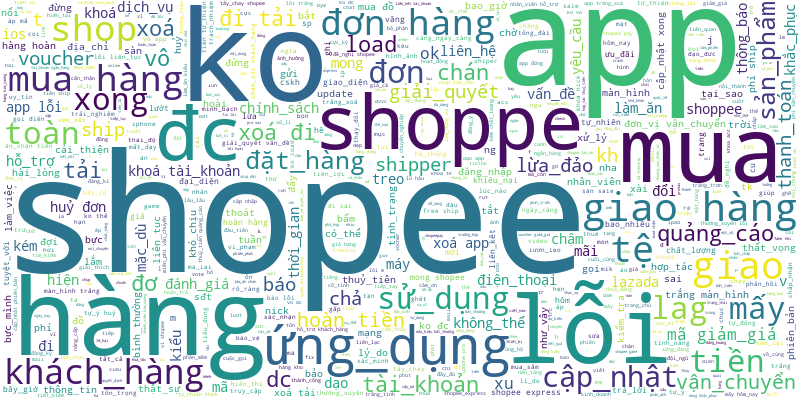

In [21]:
long_string = ','.join(list(df['text_without_emo'].apply(lambda x: ' '.join([word for word in x])).values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',width=800,height=400)
wordcloud.generate(long_string)
wordcloud.to_image()

In [22]:
import gensim
import gensim.corpora as corpora

id2word = corpora.Dictionary(df['text_without_emo'].apply(lambda x: ' '.join([word for word in x])).str.split())
texts = df['text_without_emo'].apply(lambda x: ' '.join([word for word in x])).str.split()
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


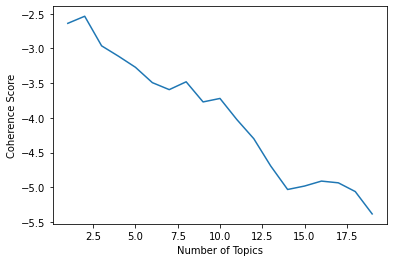

In [23]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary =id2word, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()